In [46]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='skill_count', ylabel='skill_pay'>

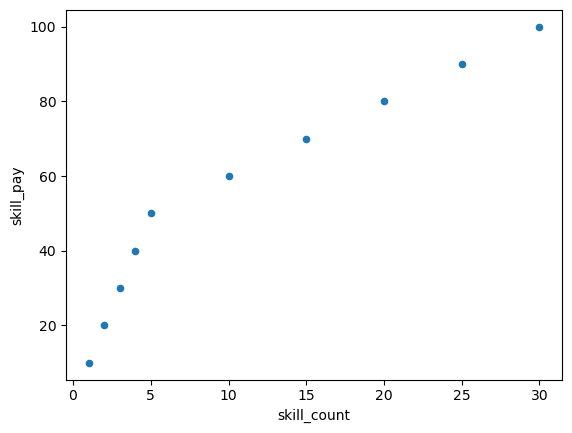

In [43]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)

df.plot(kind='scatter', x='skill_count', y='skill_pay')

In [48]:
df_exploded = df.explode('job_skills')
print(df_exploded.columns.tolist())
print(df_exploded.head())
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills']
        job_title_short                                          job_title  \
0  Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...   
1          Data Analyst                                       Data Analyst   
1          Data Analyst                                       Data Analyst   
1          Data Analyst                                       Data Analyst   
1          Data Analyst                                       Data Analyst   

                   job_location           job_via job_schedule_type  \
0                 Watertown, CT   via Work Nearby         Full-time   
1  Guadalajara, Jalisco, Mexico  via BeBee México         Full-time   
1  Guadalaj

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


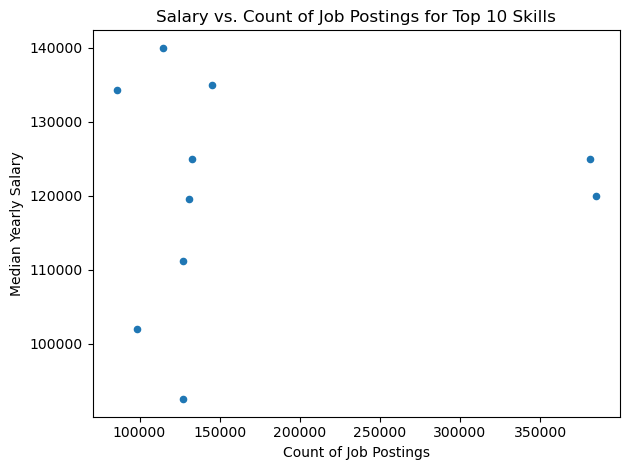

In [49]:
skill_stats
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

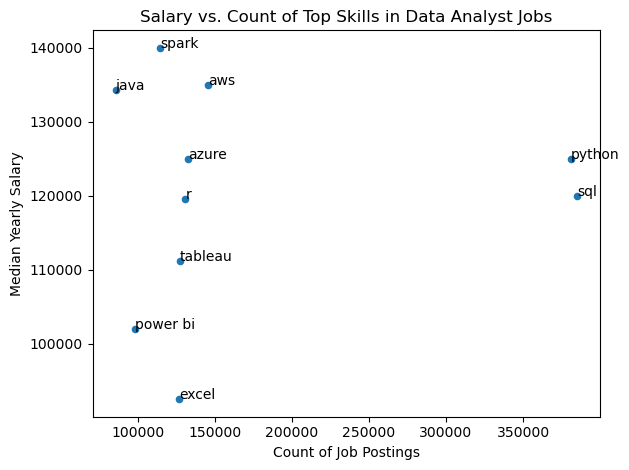

In [50]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()